# New Findings (11/6/2020)
<ul>  
<li><a href="#1">Finding 1</a></li> 
<li><a href="#2">Finding 2</a></li> 
<li><a href="#3">Finding 3</a></li> 
</ul>

In [1]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree

In [2]:
calls = pd.read_csv('calls.csv')
calls.head()

,date,call_disposition,contact_id
0,2019-10-25,Left Voicemail,8820954680632966332
1,2019-10-25,No Answer,8820954680632966332
2,2019-10-28,Call Back Later,9085041672616908600
3,2019-07-31,Bad Number,6174483391018071888
4,2019-09-26,No Answer,6174483391018071888


In [4]:
calls.shape

(367098, 3)

In [5]:
companies = pd.read_csv('companies.csv')
companies.head()

,company_id,industry,employee_range
0,01bcdf2ec356bf5,Software and Technology,20 - 49
1,030b0e04558fc88,Software and Technology,100 - 249
2,03561c542b2cdcb,Business Services,50 - 99
3,0366327bf47fb01,Financial Services,20 - 49
4,03ab9ddb892161d,Business Services,0 - 9


In [6]:
companies.shape

(31110, 3)

In [7]:
events = pd.read_csv('events.csv')
events.head()

,date,activity_action,activity_type,contact_id
0,2019-04-24,view,known_web_visit,4108398267771616228
1,2019-04-24,view,known_web_visit,1615093602351989804
2,2019-04-24,view,known_web_visit,8031730183355860699
3,2019-04-24,fill_out,form_fill,5975401237816306305
4,2019-04-24,fill_out,form_fill,3743028858149856355


In [8]:
events.shape

(111525, 4)

In [9]:
events.activity_action.value_counts()

view                  36547
open                  29646
fill_out              19870
click                 13464
filled_out_form       11789
attended_in_person      209
Name: activity_action, dtype: int64

In [10]:
events.activity_type.value_counts()

known_web_visit    36547
form_fill          31659
email_open         29646
email_click        13464
attended_event       209
Name: activity_type, dtype: int64

In [11]:
opportunies = pd.read_csv('opportunities.csv')
opportunies.head()

,company_id,created_date
0,73813c646290a71,2019-10-30
1,779be5c06f90563,2019-10-18
2,819d511f53f2ffd,2019-07-08
3,a2f1338863c2991,2019-08-09
4,2ddff3202da56e0,2019-09-23


In [12]:
opportunies.shape

(3213, 2)

In [13]:
# who called
people = pd.read_csv('people.csv')
people.head()

,job_level,job_function,company_id,contact_id
0,Manager,Operations,b9870ba24bb001c,1607962447045298548
1,Staff,Operations,c621a5f1e6166a7,5027514905586639586
2,Staff,Information Technology,dbd256e1136d4c9,3341080993372923602
3,Staff,Product Management,fc9d9436161e0b2,6701017887638098845
4,Manager,Finance,e7021bffb28cfb2,1711068408549891452


In [14]:
people.shape

(64429, 4)

In [15]:
people.job_level.value_counts()

Director          13217
Staff             12990
C-Level            9376
Manager            8200
Other              7880
Vice President     7805
Senior             4961
Name: job_level, dtype: int64

In [16]:
people.job_function.value_counts()

Engineering                       13646
Other                              8256
Product Management                 7545
Management                         7076
Information Technology             6153
Business Development               4629
Operations                         4106
Finance                            2523
Marketing                          2402
Sales                              1584
Customer Service & Support         1409
Consulting                          932
Human Resources                     703
Administrative                      539
Arts and Design                     539
Media & Communications              432
Healthcare Services                 431
Education                           327
Quality Assurance                   325
Accounting                          293
Legal                               253
Purchasing                          243
Real Estate                          48
Military & Protective Services       35
Name: job_function, dtype: int64

<a id='1'></a>
## Finding 1: Merge the table in a wrong way, duplicated contact_id

In [17]:
calls.merge(events, on='contact_id', how='left').head(10)

,date_x,call_disposition,contact_id,date_y,activity_action,activity_type
0,2019-10-25,Left Voicemail,8820954680632966332,NaN,NaN,NaN
1,2019-10-25,No Answer,8820954680632966332,NaN,NaN,NaN
2,2019-10-28,Call Back Later,9085041672616908600,NaN,NaN,NaN
3,2019-07-31,Bad Number,6174483391018071888,NaN,NaN,NaN
4,2019-09-26,No Answer,6174483391018071888,NaN,NaN,NaN
5,2019-09-26,No Answer,1848273219698443716,NaN,NaN,NaN
6,2019-09-26,No Answer,1848273219698443716,NaN,NaN,NaN
7,2019-12-16,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
8,2019-12-16,No Answer,2860445931853436299,2019-11-18,open,email_open
9,2019-12-16,No Answer,2860445931853436299,2019-11-15,click,email_click


In [18]:
#example to explain why
calls.query('contact_id == 2860445931853436299')

,date,call_disposition,contact_id
7,2019-12-16,No Answer,2860445931853436299
27386,2019-11-13,No Answer,2860445931853436299
27387,2019-11-13,No Answer,2860445931853436299
27388,2019-11-15,MC - MQL/QMA,2860445931853436299


In [19]:
events.query('contact_id == 2860445931853436299')

,date,activity_action,activity_type,contact_id
4554,2019-11-13,view,known_web_visit,2860445931853436299
12602,2019-11-18,open,email_open,2860445931853436299
18874,2019-11-15,click,email_click,2860445931853436299
23288,2019-12-04,click,email_click,2860445931853436299
32547,2019-11-13,open,email_open,2860445931853436299
33425,2019-11-18,click,email_click,2860445931853436299
46758,2019-11-13,fill_out,form_fill,2860445931853436299


In [20]:
calls.merge(events, on='contact_id', how='left').query('contact_id == 2860445931853436299')

,date_x,call_disposition,contact_id,date_y,activity_action,activity_type
7,2019-12-16,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
8,2019-12-16,No Answer,2860445931853436299,2019-11-18,open,email_open
9,2019-12-16,No Answer,2860445931853436299,2019-11-15,click,email_click
10,2019-12-16,No Answer,2860445931853436299,2019-12-04,click,email_click
11,2019-12-16,No Answer,2860445931853436299,2019-11-13,open,email_open
12,2019-12-16,No Answer,2860445931853436299,2019-11-18,click,email_click
13,2019-12-16,No Answer,2860445931853436299,2019-11-13,fill_out,form_fill
76392,2019-11-13,No Answer,2860445931853436299,2019-11-13,view,known_web_visit
76393,2019-11-13,No Answer,2860445931853436299,2019-11-18,open,email_open
76394,2019-11-13,No Answer,2860445931853436299,2019-11-15,click,email_click


By the wrong merge way, there are more duplicated rows produced.

In [21]:
# calls.call_disposition.value_counts()

In [22]:
# calls.groupby(['contact_id', 'date', 'call_disposition']).count()

<a id='2'></a>
## Finding 2: The most activities (194 times) company did not pick up 5 phone calls. 

In [23]:
#sorted sum of the events for grouped id
event_counts_by_id = events.groupby('contact_id').count().sort_values('date', ascending=False).reset_index().drop(['date','activity_type'], axis=1)
event_counts_by_id

,contact_id,activity_action
0,7505295075260161764,194
1,6357049929604753860,180
2,2323650454700737097,147
3,5610714029673303456,143
4,5873495652945372648,143
...,...,...
22246,5093462128937294245,1
22247,5090638181239071626,1
22248,2754883680870950698,1
22249,8433994941758218844,1


In [24]:
#the call response with most events company
calls.query("contact_id == 2323650454700737097")

,date,call_disposition,contact_id
41590,2019-08-20,No Answer,2323650454700737097
41591,2019-07-26,No Answer,2323650454700737097
41592,2019-09-10,No Answer,2323650454700737097
41593,2019-09-10,No Answer,2323650454700737097
41594,2019-07-25,Left Voicemail,2323650454700737097
41595,2019-07-25,No Answer,2323650454700737097
41596,2019-07-23,Left Voicemail,2323650454700737097
41597,2019-07-29,No Answer,2323650454700737097
41598,2019-09-19,Left Voicemail,2323650454700737097
41599,2019-09-04,No Answer,2323650454700737097


In [25]:
# calls.call_disposition.unique()

<a id='3'></a>
## Finding 3: Scatterplot Display

### Important Step: Mapping the Positive Variables

In [26]:
calls.call_disposition.value_counts()

No Answer                         314912
Left Voicemail                     14671
Bad Number                          7114
Call Back Later                     6571
MC - No Need                        5370
MC - Meaningful Conversation        5138
MC - MQL/QMA                        2598
Left Live Message                   2415
MC - No Timeline                    1836
MC - Meeting Confirmation           1356
MC - No Authority                   1129
Wrong Point of Contact              1018
No Longer w/ Company                 995
Discovery Call Scheduled             981
MC - No Budget                       476
MC - No Technical Fit                293
Voicemail- Left Voicemail Drop       186
Call - No Answer                      38
MC - Call Back                         1
Name: call_disposition, dtype: int64

In [27]:
#if positive responses return 1 in call_disposition column
def get_pos(x):
    if x == 'MC - Meaningful Conversation':
        return 1
    elif x == 'MC - Meeting Confirmation':
        return 1
    elif x == 'MC - MQL/QMA':
        return 1
    elif x == 'MC - No Need':
        return 1
    elif x == 'MC - No Authority':
        return 1
    elif x == 'MC - No Budget':
        return 1
    elif x == 'MC - No Timeline':
        return 1
    elif x == 'MC - No Technical Fit':
        return 1
    elif x == 'MC - Call Back':
        return 1
    else:
        return 0

In [28]:
#sum up the positive responses to call_disposition
calls_temp = calls.copy()
calls_temp.call_disposition = calls_temp.call_disposition.apply(get_pos)
calls_temp = calls_temp.drop('date', axis=1).groupby('contact_id').sum().reset_index()
calls_temp.head()

,contact_id,call_disposition
0,166566594430710,0
1,266253115414781,0
2,638342195131369,0
3,958870857640301,0
4,1005177608297129,0


In [29]:
# value counts for each positive responses
calls_temp['call_disposition'].value_counts()

0     50517
1     11434
2      1915
3       534
4       160
5        55
6        27
7         9
9         3
8         2
11        2
12        2
19        1
10        1
13        1
14        1
18        1
28        1
Name: call_disposition, dtype: int64

In [30]:
# calls_temp[calls_temp['call_disposition'] > 0]
# event_counts_by_id

In [31]:
#find out the relationship between call response and events times
#combine call and events table
combined = calls_temp.merge(event_counts_by_id, on='contact_id', how='left')
combined = combined.dropna()
combined

,contact_id,call_disposition,activity_action
5,1087052746460939,0,4.0
9,1725649318096176,1,2.0
13,2172390189079170,1,2.0
14,2281871236130720,0,1.0
15,2497165314871410,0,7.0
...,...,...,...
64650,9220737175662006854,1,2.0
64651,9220988583412404301,0,19.0
64654,9221365981464707787,1,2.0
64655,9221691394698869671,1,11.0


In [32]:
combined['call_disposition'].value_counts()

0     13604
1      6722
2      1341
3       396
4       110
5        48
6        15
7         9
12        2
13        1
28        1
8         1
19        1
Name: call_disposition, dtype: int64

In [33]:
combined[combined['call_disposition'] > 0].shape[0]

8647

In [34]:
combined.shape[0]

22251

In [35]:
combined[combined['call_disposition'] > 0].shape[0] / combined.shape[0]

0.38861174778661633

We have 8647 positive responses over 22251 calls. Only 38.9% rows are meaningful conversation.

In [36]:
# calls.query("call_disposition == 'MC - Meaningful Conversation'")

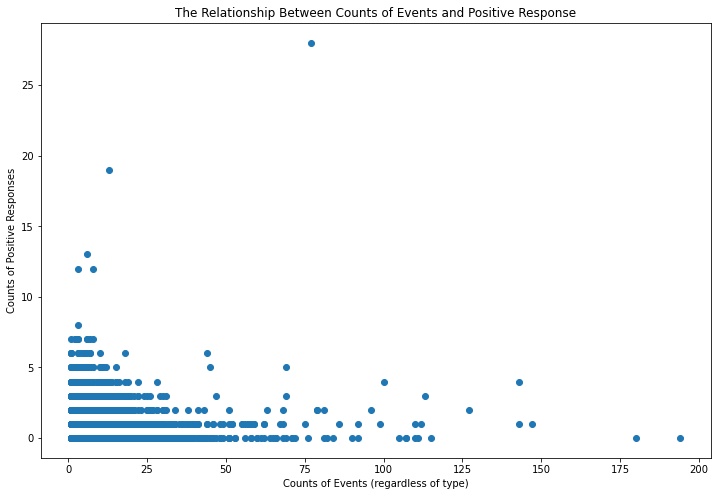

In [37]:
#draw scatterplot 
plt.figure(figsize=(12,8))
plt.scatter(combined.activity_action, combined.call_disposition)
plt.title('The Relationship Between Counts of Events and Positive Response')
plt.xlabel('Counts of Events (regardless of type)')
plt.ylabel('Counts of Positive Responses')
plt.show()

Based on the scatterplot:
1. Most companies have many counts of events and no positive responses.
2. Only few of the companies have high positive responses.

Suggestion:
1. Train the employees working in the Call Center with people skills so that during call they can be more friendly and engaging.
2. Maintain a tracker which reminds of follow-ups so that the representative can talk to the person again and try to convince them in purchasing 6sense product.
5. Contact persons from the previous company who responded since they are more likely to buy their product.

Similar Kaggle Sample:
https://www.kaggle.com/loveall/cleaning-visualizing-and-modeling-cold-call-data

## More to-do:
1. Data preprocessing
2. Do the correlation, find out the relationship between positive response and other features. 
3. Add more features like the gap between each phones call day time or each events duration. One feature for max, one for min. (4 features)
4. Continue to finish the model.
5. More testing.

## More
Besides, if we want to find out which day is the specific day to call or which day the proportion of positive call responses is largest, we could use statistical way to do it, like draw a bar chart. It is more visualized. 